1. determinar antecedentes (variables) y consecuentes (salidas)
2. Declarar el universo de discurso (el rango donde puede existir la variable
3. Definir conjuntos borrosos y funciones de pertenencia
4. Crear la base de conocimiento
5. Dibujar conjuntos borrosos

- Cambios Lentos: sigmoideas y gaussianas
- Cambios Rapidos: trapecios y triangulos
- Pertenencia absoluta esperada: trapecios o doble sigmoidea
- Pertenencia relativa: gaussianas y triangulares
## Variables: 
Entradas:
1. Velocidad km/h [0;1000]
- Alta [400,500,600,600]
- Media [200,350,450]
- Baja [100,100,250,300]
3. Angulo de turbulencia ° [-10;10]
- Ascenso [1, 2, 5,5]
- Nivel [-2,0,2]
- Descenso [-5, -5,-2,-1]
Salidas:
1. Posicion del timon cm [0;10]
- Muy alta [8,9,10,10]
- Alta [6,7,9]
- Media [4,5,7]
- Baja [3,4,6]
- Muy baja [0,0,1,3]
## Base de conocimiento:
Filas: Angulo
Columnas: Velocidad

|         | Alta    | Media  | Baja     |
|---------|---------|--------|----------|
| Ascenso | Baja    | Baja   | Baja     |
| Nivel   | Media   | Media  | Media    |
| Descenso| Alta    | Media  | Muy Alta |
 |
a  |
a  |9  |

In [27]:
!pip install scikit-fuzzy


[notice] A new release of pip available: 22.2.1 -> 23.2.1
[notice] To update, run: python.exe -m pip install --upgrade pip


## Librerias

In [28]:
#Tratamiento de datos
import numpy as np
#Motor de inferencia
import skfuzzy
from skfuzzy import control as ctrl

#Graficos
import matplotlib.pyplot as plt

#Advertencias
import warnings
warnings.filterwarnings("ignore")


Fuzzyficar es convertir la variable en linguistica
1. Declarar los universos de discurso
2. Fuzzyficar antecedentes y consecuentes
3. Implementar la base de conocimiento
4. Activar el motor de reglas
5. Utilizar el sistema de inferencia borrosa (SIB) para un caso especifico (Defuzzyficacion)

# 1. Declarar los universos de discurso

In [29]:
#Velocidad del avion
velocidad = ctrl.Antecedent(np.arange(0,1001, 1),"velocidad")
#Angulo de turbulencia
angulo = ctrl.Antecedent(np.arange(-10,10,0.1), "angulo")
#Posicion del timon
posicion = ctrl.Consequent(np.arange(0,11,1), "posicion")

# 2. Fuzzificar las variables del SIB

<function matplotlib.pyplot.show(close=None, block=None)>

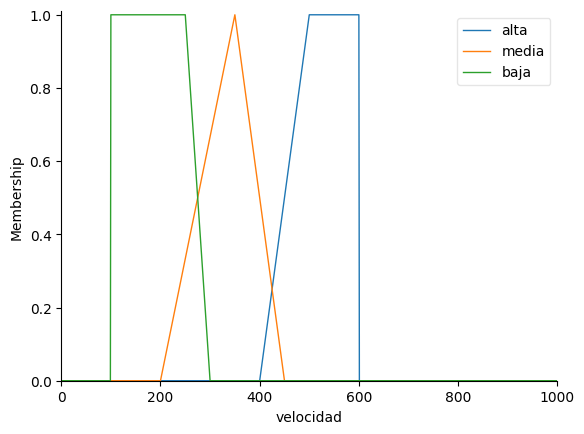

In [30]:
#Velocidad del avion
velocidad['alta'] = skfuzzy.trapmf(velocidad.universe,[400,500,600,600])
velocidad['media'] = skfuzzy.trimf(velocidad.universe, [200,350,450])
velocidad['baja'] = skfuzzy.trapmf(velocidad.universe, [100,100,250,300])
velocidad.view()
plt.show

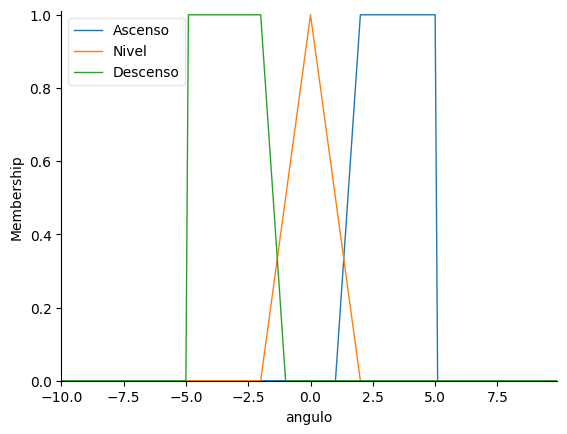

In [31]:
#Angulo de turbulencia
angulo["Ascenso"] = skfuzzy.trapmf(angulo.universe, [1,2,5,5])
angulo["Nivel"] = skfuzzy.trimf(angulo.universe, [-2,0,2])
angulo["Descenso"] = skfuzzy.trapmf(angulo.universe, [-5,-5,-2,-1])

angulo.view()
plt.show()

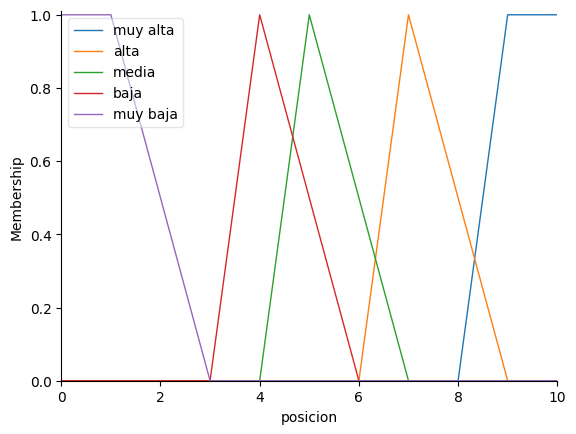

In [32]:
#Posicion del timon
posicion["muy alta"] = skfuzzy.trapmf(posicion.universe, [8,9,10,10])
posicion["alta"] = skfuzzy.trimf(posicion.universe, [6,7,9])
posicion["media"] = skfuzzy.trimf(posicion.universe, [4,5,7])
posicion["baja"] = skfuzzy.trimf(posicion.universe, [3,4,6])
posicion["muy baja"] = skfuzzy.trapmf(posicion.universe, [0,0,1,3])
posicion.view()
plt.show()

# 3. Crear la base de conocimiento

In [33]:
regla1 = ctrl.Rule(velocidad["alta"] & angulo["Ascenso"], posicion["baja"])
regla2 = ctrl.Rule(velocidad["alta"] & angulo["Nivel"], posicion["media"])
regla3 = ctrl.Rule(velocidad["alta"] & angulo["Descenso"], posicion["alta"])
regla4 = ctrl.Rule(velocidad["media"] & angulo["Ascenso"], posicion["baja"])
regla5 = ctrl.Rule(velocidad["media"] & angulo["Nivel"], posicion["media"])
regla6 = ctrl.Rule(velocidad["media"] & angulo["Descenso"], posicion["media"])
regla7 = ctrl.Rule(velocidad["baja"] & angulo["Ascenso"], posicion["muy baja"])
regla8 = ctrl.Rule(velocidad["baja"] & angulo["Nivel"], posicion["media"])
regla9 = ctrl.Rule(velocidad["baja"] & angulo["Descenso"], posicion["muy alta"])

# 4. Activar el motor de inferencia

In [34]:
controlVuelo = ctrl.ControlSystem([regla1, regla2, regla3,
                                   regla4, regla5,regla6,
                                   regla7,regla8,regla9])

# 5. Utilizar el SIB

In [35]:
#Velocidad = 515km/h
#Angulo = -2.5°
posicionTimon = ctrl.ControlSystemSimulation(controlVuelo)
posicionTimon.input["velocidad"]=515
posicionTimon.input["angulo"] = -2.5
posicionTimon.compute()

In [36]:
posicionTimon.output["posicion"]

7.333333333333335

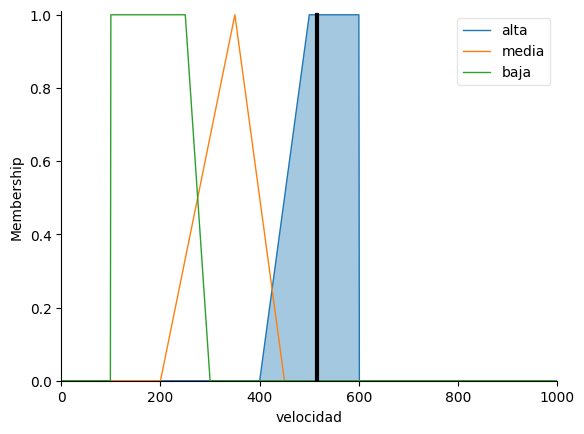

In [37]:
#Reglas activadas en velocidad
velocidad.view(sim = posicionTimon)


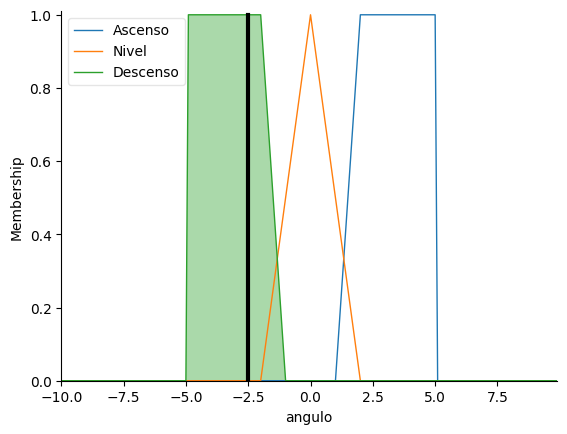

In [38]:
#Reglas activadas en angulo
angulo.view(sim = posicionTimon)


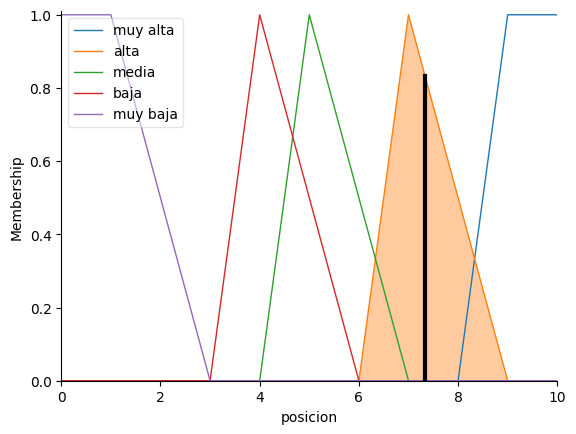

In [39]:
#Reglas activadas en velocidad
posicion.view(sim = posicionTimon)


In [40]:
#Velocidad = 250km/h
#Angulo = -1.5°
posicionTimon = ctrl.ControlSystemSimulation(controlVuelo)
posicionTimon.input["velocidad"]=250
posicionTimon.input["angulo"] = -1.5
posicionTimon.compute()

In [41]:
posicionTimon.output["posicion"]

7.315718157181572

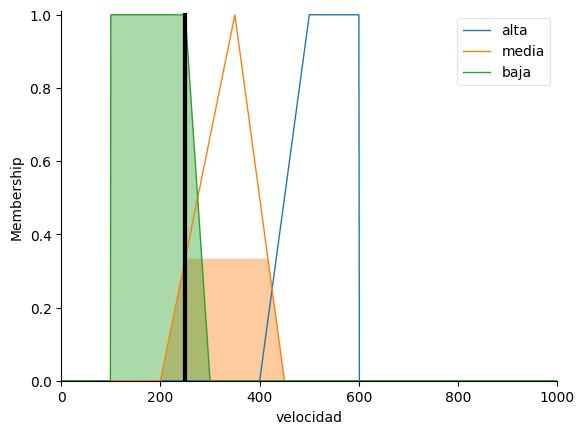

In [42]:
#Reglas activadas en velocidad
velocidad.view(sim = posicionTimon)


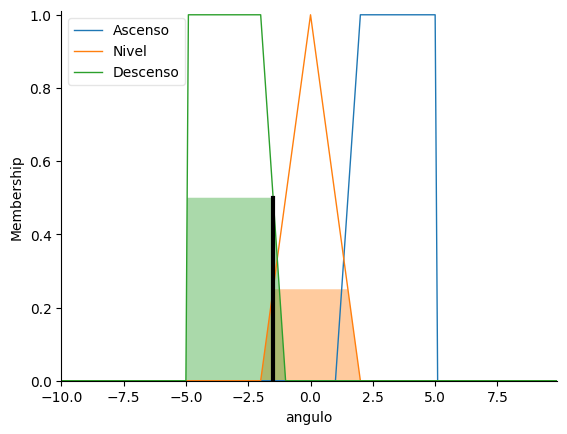

In [43]:
#Reglas activadas en angulo
angulo.view(sim = posicionTimon)


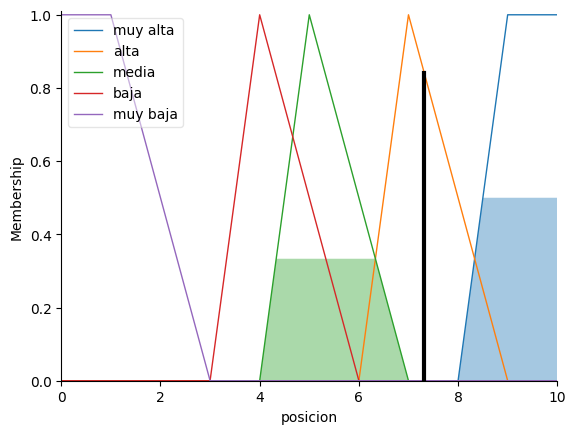

In [44]:
#Reglas activadas en velocidad
posicion.view(sim = posicionTimon)
